###### **Repository :** [https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia](https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia)  
###### **Équipe :** Assia Alaoui (travail individuel)


#### Quelques définitions
###### J'ai demandé à copilot de m'expliquer simplement les notions suivantes.

###### Accélération : est la variation de la vitesse d'un objet par rapport au temps. 

###### Accélérométrie : est la technique qui consiste à mesurer l’accélération d’un corps dans l’espace à l’aide d’un capteur (accéléromètre).

###### ENMO (Euclidean Norm Minus One) : est un indicateur d’activité physique calculé comme la norme √(x²+y²+z²) des accélérations, diminuée de 1 g (gravité), puis tronquée à 0 pour ne garder que le mouvement net.

###### Epoque : est une fenêtre de temps fixe (par ex. 10 s, 30 s, 60 s) dans laquelle on regroupe toutes les mesures pour les résumer en une seule valeur (souvent la moyenne).


###### On commence par la lecture des données.  On importe le fichier `0_z.csv` qui contient les colonnes de temps (t, en secondes) et les trois composantes d’accélération (x, y, z en g).

In [34]:
import pandas as pd

###### On lit le fichier en ignorant la première ligne de commentaire : accelerometer data in g.

In [35]:
df = pd.read_csv("0_z.csv", comment="#")

###### On affiche les 5 premières lignes et les noms de colonnes pour vérifier que le fichier est bien lu et que les colonnes ont la bonne structure.

In [36]:
print(df.head())
print(df.columns)

      t       x       y       z
0  0.00 -0.0938 -0.0156  0.9531
1  0.02 -0.0938 -0.0156  0.9531
2  0.04 -0.0938 -0.0156  0.9531
3  0.06 -0.0938 -0.0156  0.9531
4  0.08 -0.0938 -0.0156  0.9531
Index(['t', 'x', 'y', 'z'], dtype='object')


###### On passe au calcul de l'ENMO puis on vérifie les 5 premières lignes. J'ai demandé à copilot de me fournir le code pour calculer l'ENMO. 


In [37]:
import numpy as np
r = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
df["enmo"] = np.maximum(0, r - 1)
print(df.head())

      t       x       y       z  enmo
0  0.00 -0.0938 -0.0156  0.9531   0.0
1  0.02 -0.0938 -0.0156  0.9531   0.0
2  0.04 -0.0938 -0.0156  0.9531   0.0
3  0.06 -0.0938 -0.0156  0.9531   0.0
4  0.08 -0.0938 -0.0156  0.9531   0.0


###### On regroupe les données en fenêtres fixes (époques) de 10 s, 30 s et 60 s. J'ai demandé à copilot de me réexpliquer les époques avec un exemple. Puis de me fournir le code le plus simple pour le faire.

###### On a besoin d’un index temporel pour regrouper les données par fenêtres fixes (époques). 
###### On convertit `t` (en secondes) en un format temps (`datetime`).

In [38]:
df["time"] = pd.to_datetime(df["t"], unit="s")

###### On met cette colonne en **index** du tableau. 

In [39]:
df = df.set_index("time")

###### On calcule la moyenne d'ENMO toutes les 10, 30 et 60 secondes en utilisant la fonction resample() de pandas.

In [40]:
enmo_10s = df["enmo"].resample("10s").mean()
enmo_30s = df["enmo"].resample("30s").mean()
enmo_60s = df["enmo"].resample("60s").mean()

###### On vérifie les 5 premières lignes 

In [41]:
print(enmo_10s.head())
print(enmo_30s.head())
print(enmo_60s.head())

time
1970-01-01 00:00:00    0.00004
1970-01-01 00:00:10    0.00000
1970-01-01 00:00:20    0.00000
1970-01-01 00:00:30    0.00000
1970-01-01 00:00:40    0.00000
Freq: 10s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000013
1970-01-01 00:00:30    0.000117
1970-01-01 00:01:00    0.000000
1970-01-01 00:01:30    0.000000
1970-01-01 00:02:00    0.000000
Freq: 30s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000065
1970-01-01 00:01:00    0.000000
1970-01-01 00:02:00    0.000133
1970-01-01 00:03:00    0.000093
1970-01-01 00:04:00    0.358817
Freq: 60s, Name: enmo, dtype: float64


###### On traçe les séries `enmo_10s`, `enmo_30s` et `enmo_60s`.  
###### Chaque figure montre l’évolution de l’ENMO moyen en fonction du temps, selon la taille des époques choisies.  
###### On sauvegarde les fichiers sous les noms demandés :  
###### - `enmo_plot_10.0s.png`  
###### - `enmo_plot_30.0s.png`  
###### - `enmo_plot_60.0s.png`
###### J'ai demandé à copilot de me fournir le code pour plot. 

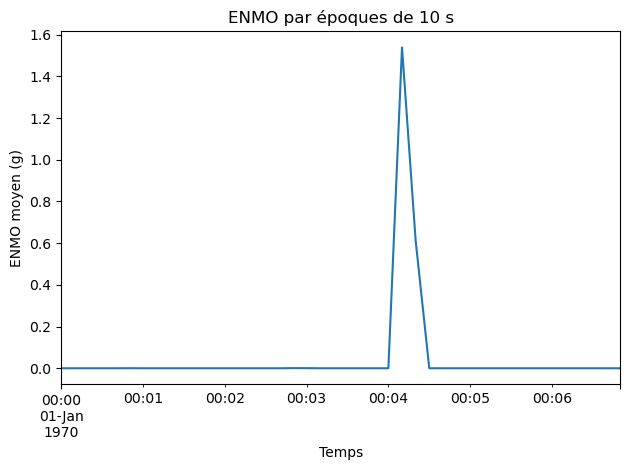

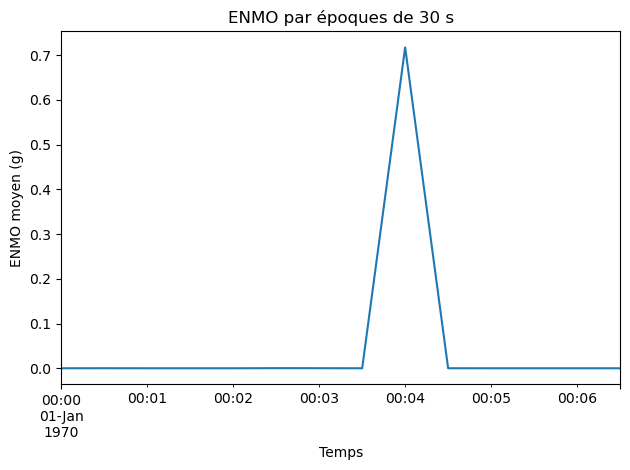

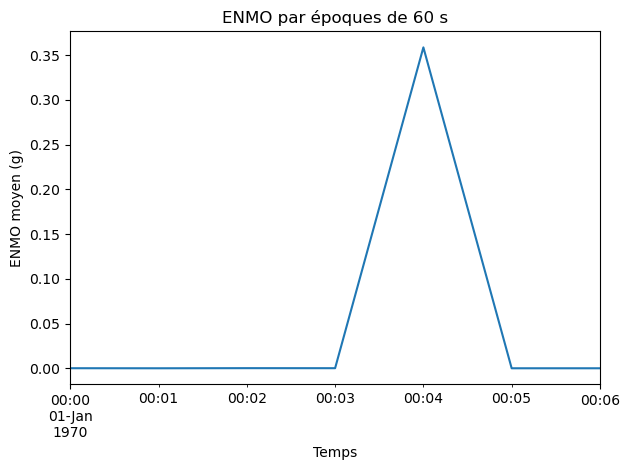

In [42]:
import matplotlib.pyplot as plt

# Plot ENMO avec époques de 10s
plt.figure()
enmo_10s.plot()
plt.title("ENMO par époques de 10 s")
plt.xlabel("Temps")
plt.ylabel("ENMO moyen (g)")
plt.tight_layout()
plt.savefig("enmo_plot_10.0s.png")
plt.show()

# Plot ENMO avec époques de 30s
plt.figure()
enmo_30s.plot()
plt.title("ENMO par époques de 30 s")
plt.xlabel("Temps")
plt.ylabel("ENMO moyen (g)")
plt.tight_layout()
plt.savefig("enmo_plot_30.0s.png")
plt.show()

# Plot ENMO avec époques de 60s
plt.figure()
enmo_60s.plot()
plt.title("ENMO par époques de 60 s")
plt.xlabel("Temps")
plt.ylabel("ENMO moyen (g)")
plt.tight_layout()
plt.savefig("enmo_plot_60.0s.png")
plt.show()

###### J'ai posé à copilot quelques questions concernant les graphes. Pourquoi retrouve-t-on le pic d’ENMO au même instant pour les époques de 10s, 30s et 60s, alors que son amplitude varie ? Est-ce dû au fait que l’augmentation de la taille des époques dilue l’information ? Quelles conséquences cela a-t-il sur l’analyse ?

###### Sa réponse : 
###### Le pic est situé au même instant car il correspond à un événement réel (un mouvement précis). Son amplitude change parce qu’une époque plus longue moyenne l’information sur une fenêtre plus large, ce qui lisse et réduit l’intensité apparente.
###### Époques courtes = meilleure détection des mouvements brefs et intenses.
###### Époques longues = signal plus lissé, perte de détails mais meilleure vue d’ensemble.